In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
import sklearn
from sklearn.preprocessing import LabelEncoder


%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
%%time
# load data
labels = pd.read_csv('../input/labels.csv').astype(int)
trn = pd.read_csv('../input/train_ver2.csv')
fecha_dato = trn['fecha_dato']

# get index
train_index = (labels[fecha_dato == '2015-06-28'].sum(axis=1) > 0)
train_index = train_index[train_index == True]

# trim train data and save
train = trn.ix[train_index.index]
train.iloc[:,24:] = labels.ix[train_index.index]

# melt data into single target dataframe
data = []
for ind, (run, row) in enumerate(train.iterrows()):
    for i in range(24):
        if row[24+i] == 1:
            temp = row[:24].values.tolist()
            temp.append(i)
            data.append(temp)
            
cols = trn.columns[:24].tolist()
cols.append('target')
train = pd.DataFrame(data, columns = cols)
train.to_csv('../input/train.csv',index=False)


<string>:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 2min 21s


### 컬럼 이름 출력을 하고싶은 경우 df.columns
### 컬럼 개수 출력을 하고싶은 경우 len(df.columns)

In [3]:
print(trn.columns)
print(len(trn.columns))

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')
48


### 고유한 값이 어떻게 되는지 알고 싶다면


np.unique(df[col].astype(str))

col값을 변수로 두고 for문을 돌리면 됩니다-!

In [6]:
np.unique(trn["sexo"].astype(str))

array(['H', 'V', 'nan'], dtype=object)

### 그래프를 그릴 때 도화지를 어떻게 그릴것인가-!!1

plt.subplots(figsize=(10,5))

f => figure

ax => axes


countplot : 카테고리의 데이터 갯수를 시각화

barplot : 막대 그래프

jointplot : 두 변수의 관계를 나타내는 그래프 kind에 따라 다름


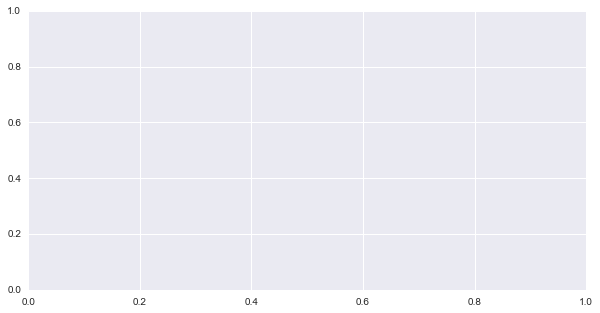

In [14]:
f, ax = plt.subplots(figsize=(10, 5))

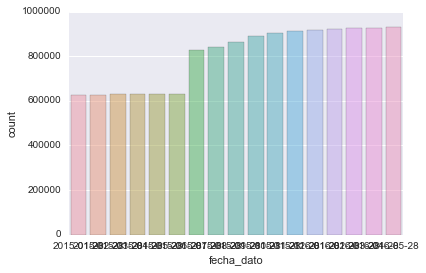

In [15]:
sns.countplot(x=trn["fecha_dato"], data=trn, alpha=0.5)
plt.show()

### 특정 값의 개수를 새고 싶다면..!! 

trn[col].value_counts()

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

In [28]:
trn["fecha_dato"].value_counts()

2016-05-28    931453
2016-04-28    928274
2016-03-28    925076
2016-02-28    920904
2016-01-28    916269
2015-12-28    912021
2015-11-28    906109
2015-10-28    892251
2015-09-28    865440
2015-08-28    843201
2015-07-28    829817
2015-06-28    632110
2015-05-28    631957
2015-04-28    630367
2015-03-28    629209
2015-02-28    627394
2015-01-28    625457
Name: fecha_dato, dtype: int64

### 숫자가 문자로 되어있는 경우, 공백을 제거하는 테크닉

int()로 표현하면 모두 사라짐-!

In [29]:
aaaaa = "   2   "

In [30]:
int(aaaaa) 

2

### 전처리

df[col].replace("NA", 0, inplace=True) => NA값을 0으로 바꾼 후,

df[col] = df[col]].astype(int) => int화 시킨후 다시 넣기!

In [ ]:
train_data[col].replace(' NA',0,inplace=True)
train_data[col] = train_data[col].astype(int)

### tolist() 

=> list로 나오느냐 array로 나오느냐..!!!

In [33]:
np.unique(trn["sexo"].astype(str)).tolist()

['H', 'V', 'nan']

In [34]:
np.unique(trn["sexo"].astype(str))

array(['H', 'V', 'nan'], dtype=object)

In [35]:
label_cols = trn.columns[24:] .tolist()
trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')

fecha_dato
2015-01-28     95601
2015-02-28     94543
2015-03-28     97211
2015-04-28     98312
2015-05-28     96487
2015-06-28     98655
2015-07-28     99981
2015-08-28     96045
2015-09-28    100726
2015-10-28    104427
2015-11-28    104990
2015-12-28    107320
2016-01-28    107033
2016-02-28    108668
2016-03-28    110915
2016-04-28    111748
2016-05-28    113050
Name: ind_recibo_ult1, dtype: int64

In [36]:
label_cols

['ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

In [44]:
# np.asarray

# Convert the input to an array.

# Parameters
# ----------
# a : array_like
#     Input data, in any form that can be converted to an array.  This
#     includes lists, lists of tuples, tuples, tuples of tuples, tuples
#     of lists and ndarrays.
# dtype : data-type, optional
#     By default, the data-type is inferred from the input data.
# order : {'C', 'F'}, optional
#     Whether to use row-major (C-style) or
#     column-major (Fortran-style) memory representation.
#     Defaults to 'C'.

# Returns
# -------
# out : ndarray
#     Array interpretation of `a`.  No copy is performed if the input
#     is already an ndarray.  If `a` is a subclass of ndarray, a base
#     class ndarray is returned.

# See Also
# --------
# asanyarray : Similar function which passes through subclasses.
# ascontiguousarray : Convert input to a contiguous array.
# asfarray : Convert input to a floating point ndarray.
# asfortranarray : Convert input to an ndarray with column-major
#                  memory order.
# asarray_chkfinite : Similar function which checks input for NaNs and Infs.
# fromiter : Create an array from an iterator.
# fromfunction : Construct an array by executing a function on grid
#                positions.

# Examples
# --------
# Convert a list into an array:

# >>> a = [1, 2]
# >>> np.asarray(a)
# array([1, 2])

# Existing arrays are not copied:

# >>> a = np.array([1, 2])
# >>> np.asarray(a) is a
# True

# If `dtype` is set, array is copied only if dtype does not match:

# >>> a = np.array([1, 2], dtype=np.float32)
# >>> np.asarray(a, dtype=np.float32) is a
# True
# >>> np.asarray(a, dtype=np.float64) is a
# False

# Contrary to `asanyarray`, ndarray subclasses are not passed through:

# >>> issubclass(np.matrix, np.ndarray)
# True
# >>> a = np.matrix([[1, 2]])
# >>> np.asarray(a) is a
# False
# >>> np.asanyarray(a) is a
# True


### 파이썬 pandas DataFrame의 iloc, loc, ix의 차이

.iloc

integer positon를 통해 값을 찾을 수 있다. label로는 찾을 수 없다

.loc

label 을 통해 값을 찾을 수 있다. integer position로는 찾을 수 없다.

.ix

integer position과 label모두 사용 할 수 있다. 만약 label이 숫자라면 label-based index만 된다.


http://yeyej.blogspot.kr/2016/02/pandas-dataframe-iloc-loc-ix.html


In [45]:
# data = []
# for ind, (run, row) in enumerate(train.iterrows()):
#     for i in range(24):
#         if row[24+i] == 1:
#             temp = row[:24].values.tolist()
#             temp.append(i)
#             data.append(temp)


### Label encoding

lb = LabelEncoder()

lb.fit_transform(data) 

In [ ]:
# lb = LabelEncoder()
# skip_cols = ['fecha_dato','ncodpers','target']
# # histogram of features
# for col in trn.columns:
#     if col in skip_cols:
#         continue
#     print('='*50)
#     print('col : ', col)

#     # check category or number
#     if col in category_cols:
#         x = lb.fit_transform(trn[col])
#         sns.jointplot(x,np.asarray(trn['target'])*1.0, kind="kde")
#     else:
#         x = trn[col]
#         sns.jointplot(x,trn['target'], kind="kde")
#     plt.show()
